In [1]:
# python -m pip install prophet
# here i will try prophet on the loged data so log(x)

In [1]:
import numpy as np
import pandas as pd
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.express as px
from datetime import datetime,date
from prophet import Prophet

%matplotlib inline
init_notebook_mode(connected=True)
cf.set_config_file(sharing='private',theme='pearl',offline=True)
#print("Cufflinks Version : {}".format(cf.__version__))

# facebook prophet requires the data to be in 2 colums named ds and y
# ds will be a datetime column with no timezone data and y the label we are forecasting
# ds must NOT be an index like other machine learning algorithms
dfActual = pd.read_csv('./data/ETH-USD.csv')
df = pd.read_csv('./data/eth-usd-max latest.csv')
df.drop(["market_cap", "total_volume"], axis=1, inplace=True)
df['price'].fillna(method='ffill', inplace=True)
df.columns = ['ds','y']
# log data for btc
# df['y'] = np.log(df['y'])
# df['y'].iplot();
dynamic_days = 1550

C:\Users\sagap\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)



In [2]:
df['y'].iplot();

In [3]:
df['ds'] = pd.to_datetime(df['ds'])
df['ds'] = df['ds'].dt.tz_localize(None)

In [4]:
df.head()

ds         y
0 2015-08-07  2.831620
1 2015-08-08  1.330750
2 2015-08-10  0.687586
3 2015-08-11  1.067379
4 2015-08-12  1.256613

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2668 non-null   datetime64[ns]
 1   y       2668 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 41.8 KB


In [6]:
df['floor'] = 0
df['cap'] = 4900
train = df.iloc[:-dynamic_days]
test = df.iloc[-dynamic_days:]

In [7]:
# This is fitting only on the training data
# now I will include the test data in the training set and forecast 2 months in the future
m = Prophet(weekly_seasonality=False, yearly_seasonality=False, daily_seasonality=False, 
                growth='logistic', seasonality_mode='multiplicative')
m.add_seasonality(name='4-year', period=1400, fourier_order=10)
m.fit(train)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=dynamic_days,freq = 'D')
future['cap'] = 4900
future['floor'] = 0
# to make predictions 
forecast = m.predict(future)

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [8]:
forecast

ds        trend   cap  floor   yhat_lower    yhat_upper  \
0    2015-08-07     0.776391  4900      0   -76.011494     66.670482   
1    2015-08-08     0.781450  4900      0   -75.259584     75.810612   
2    2015-08-10     0.791666  4900      0   -71.962749     72.999060   
3    2015-08-11     0.796825  4900      0   -76.537383     69.079900   
4    2015-08-12     0.802017  4900      0   -73.095291     70.551275   
...         ...          ...   ...    ...          ...           ...   
2663 2022-11-22  4899.046281  4900      0   269.373581    417.903515   
2664 2022-11-23  4899.052449  4900      0  2704.722192   2844.438408   
2665 2022-11-24  4899.058578  4900      0  5138.180729   5275.880413   
2666 2022-11-25  4899.064666  4900      0  7562.053880   7701.062496   
2667 2022-11-26  4899.070716  4900      0  9969.651751  10117.534705   

      trend_lower  trend_upper    4-year  4-year_lower  4-year_upper  \
0        0.776391     0.776391 -4.841390     -4.841390     -4.841390   
1        0.781450     0.781450 -4.767428     -4.767428     -4.767428   
2        0.791666     0.791666 -4.586843     -4.586843     -4.586843   
3        0.796825     0.796825 -4.480730     -4.480730     -4.480730   
4        0.802017     0.802017 -4.364438     -4.364438     -4.364438   
...           ...          ...       ...           ...           ...   
2663  4899.044132  4899.048552 -0.929430     -0.929430     -0.929430   
2664  4899.050310  4899.054709 -0.433263     -0.433263     -0.433263   
2665  4899.056449  4899.060825  0.062422      0.062422      0.062422   
2666  4899.062548  4899.066903  0.557088      0.557088      0.557088   
2667  4899.068609  4899.072941  1.050197      1.050197      1.050197   

      multiplicative_terms  multiplicative_terms_lower  \
0                -4.841390                   -4.841390   
1                -4.767428                   -4.767428   
2                -4.586843                   -4.586843   
3                -4.480730                   -4.480730   
4                -4.364438                   -4.364438   
...                    ...                         ...   
2663             -0.929430                   -0.929430   
2664             -0.433263                   -0.433263   
2665              0.062422                    0.062422   
2666              0.557088                    0.557088   
2667              1.050197                    1.050197   

      multiplicative_terms_upper  additive_terms  additive_terms_lower  \
0                      -4.841390             0.0                   0.0   
1                      -4.767428             0.0                   0.0   
2                      -4.586843             0.0                   0.0   
3                      -4.480730             0.0                   0.0   
4                      -4.364438             0.0                   0.0   
...                          ...             ...                   ...   
2663                   -0.929430             0.0                   0.0   
2664                   -0.433263             0.0                   0.0   
2665                    0.062422             0.0                   0.0   
2666                    0.557088             0.0                   0.0   
2667                    1.050197             0.0                   0.0   

      additive_terms_upper          yhat  
0                      0.0     -2.982419  
1                      0.0     -2.944054  
2                      0.0     -2.839583  
3                      0.0     -2.773532  
4                      0.0     -2.698335  
...                    ...           ...  
2663                   0.0    345.727326  
2664                   0.0   2776.474548  
2665                   0.0   5204.867048  
2666                   0.0   7628.273997  
2667                   0.0  10044.059812  

[2668 rows x 18 columns]

<AxesSubplot:xlabel='ds'>

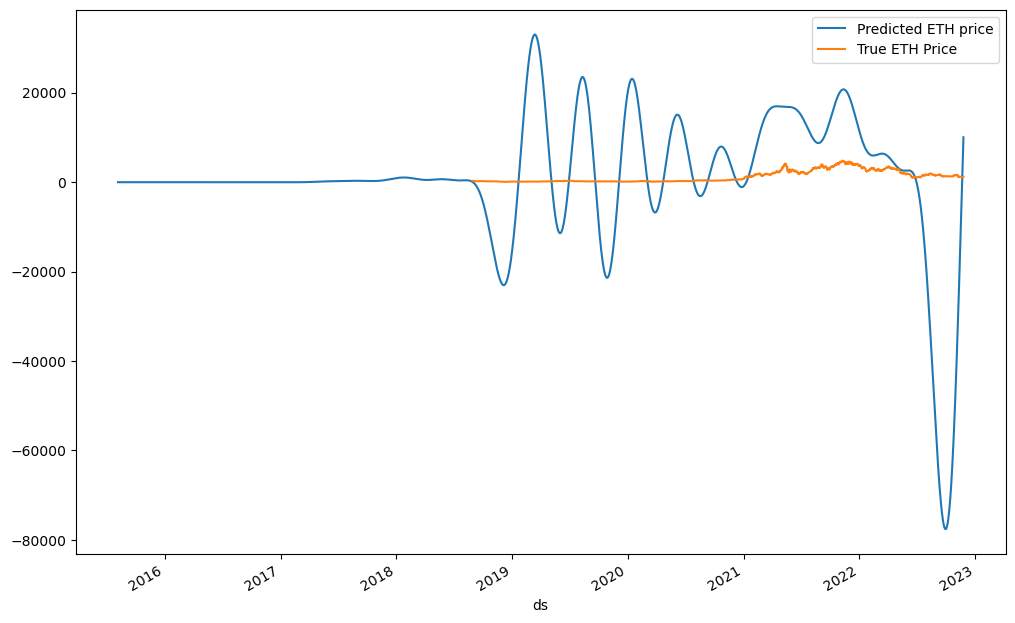

In [9]:
ax = forecast.plot(x='ds',y='yhat',label='Predicted ETH price',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True ETH Price',legend=True,ax=ax)

In [10]:
from statsmodels.tools.eval_measures import rmse

In [11]:
predictions = forecast.iloc[-dynamic_days:]['yhat']

In [12]:
rmse(predictions,test['y'])

19556.972813422926

In [13]:
# very large difference as it is roughly as equal half of the mean
test.mean()

C:\Users\sagap\AppData\Local\Temp\ipykernel_2460\3796774242.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y        1224.954168
floor       0.000000
cap      4900.000000
dtype: float64

In [14]:
# prophet has its own diagnostics. we need to define just as done below initial, period and horizon
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [15]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 1 years
period = 1 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [16]:
#df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

In [17]:
# thgis is the raw dataset that is returned via the above
#performance_metrics(df_cv)

In [18]:
# we can plt a specific metric of the above which shows that mse increases over time so up to 50 days we are ok
# more than that rmse increases a lot
#plot_cross_validation_metric(df_cv, metric='rmse');

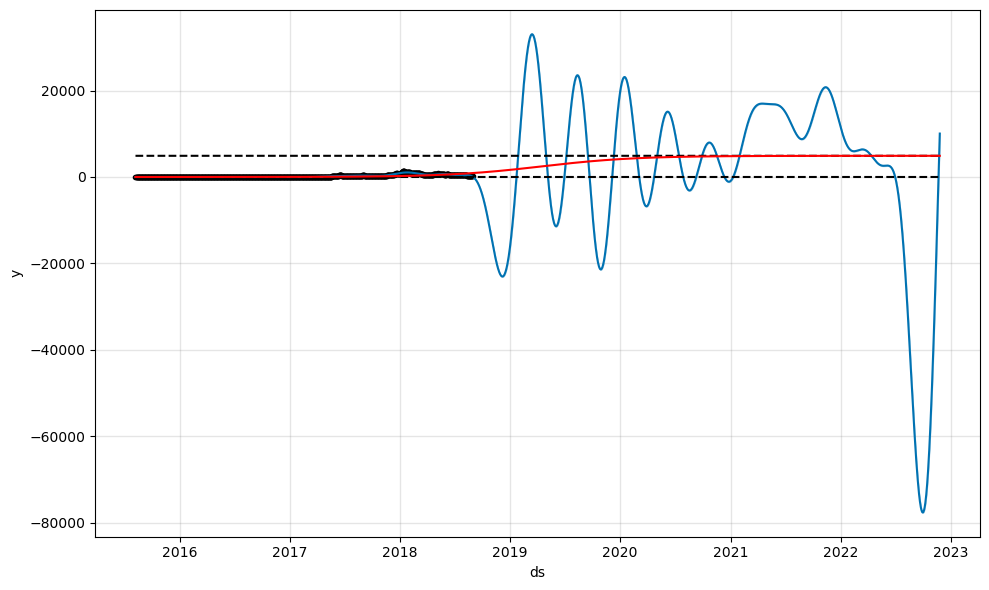

In [19]:
# to see the trend change points
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

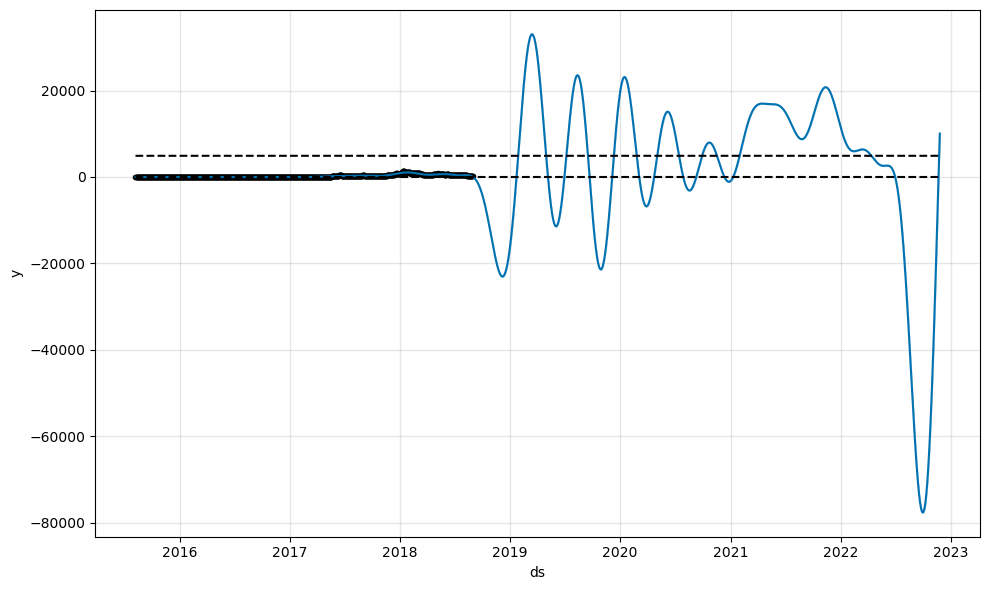

In [20]:
# we can use prophets own tools for plotting and analysis
import matplotlib.pyplot as plt
m.plot(forecast);
# plt.xlim('2014-01-01','2022-01-01') # we can use xlim to limit the data being plotted

In [21]:
# now I will include the test data in the training set and forecast 2 months in the future

m = Prophet(weekly_seasonality=False, yearly_seasonality=False, daily_seasonality=False, 
                growth='logistic', seasonality_mode='multiplicative')
m.add_seasonality(name='4-year', period=1400, fourier_order=10)
m.fit(df)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=dynamic_days,freq = 'D')
future['cap'] = 4900
future['floor'] = 0
# to make predictions 
forecast = m.predict(future)


C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



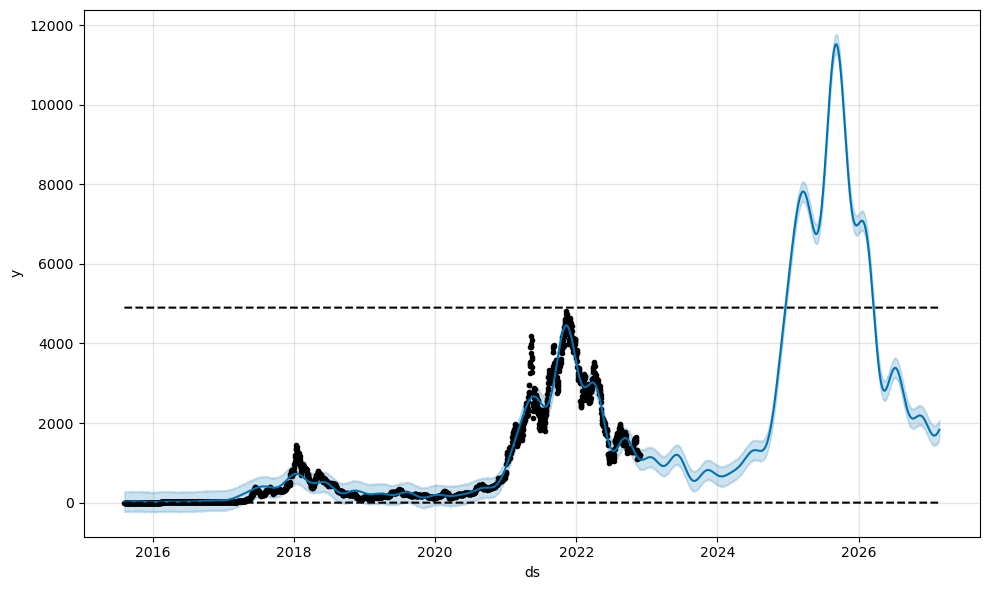

In [22]:
fig = m.plot(forecast)

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



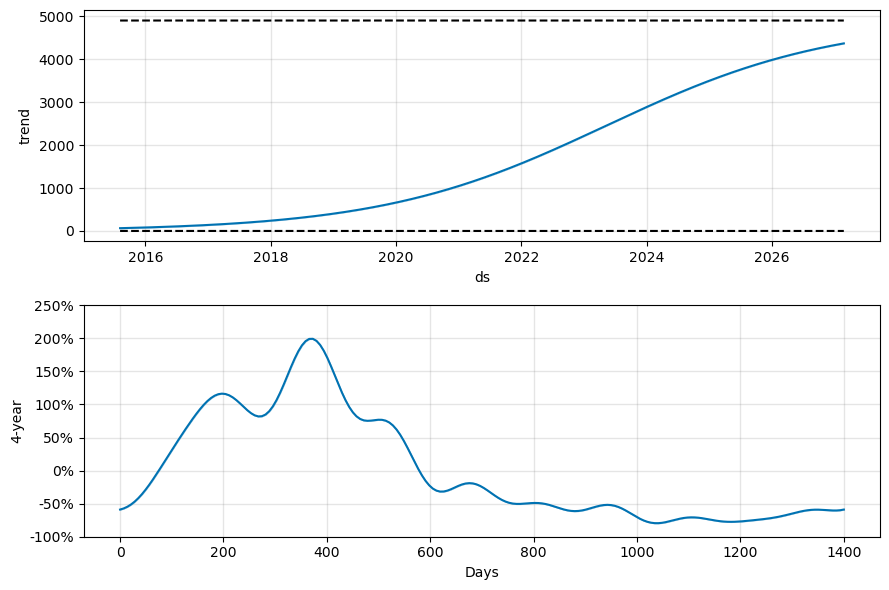

In [23]:
fig = m.plot_components(forecast)

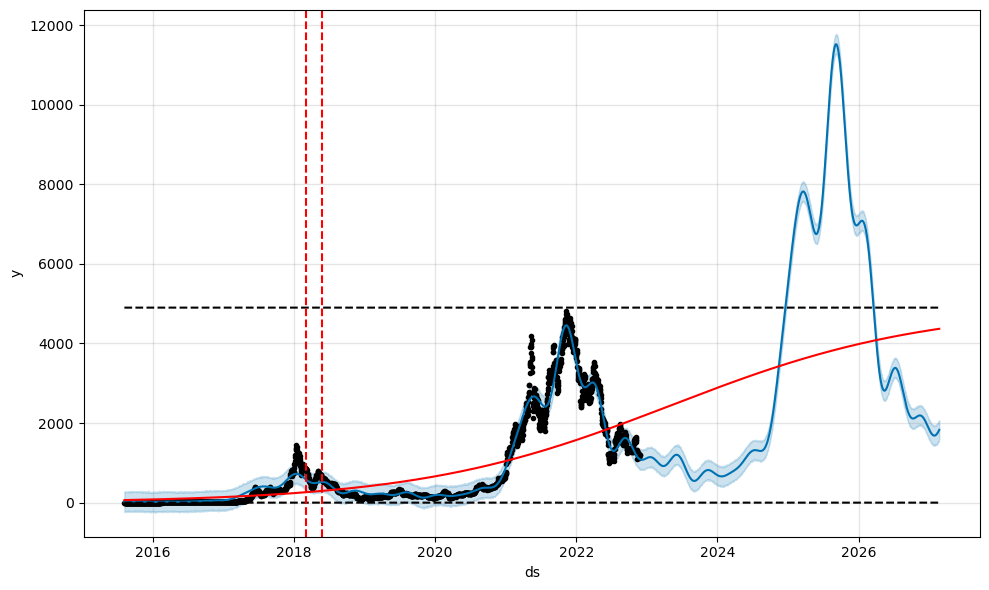

In [24]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [25]:
# final plot but with plotly
forecastPlotly = forecast.copy()
forecastPlotly['date'] = pd.to_datetime(forecastPlotly['ds'])
forecastPlotly = forecastPlotly.set_index('date')
forecastPlotly = forecastPlotly.drop(['ds'], axis=1)
forecastPlotly[['yhat_lower','yhat_upper', 'yhat']].iplot()

In [26]:
dfActual['date'] = pd.to_datetime(dfActual['Date'])
dfActual = dfActual.set_index('date')
dfActual = dfActual.drop(['Date'], axis=1)
result = forecastPlotly.join(dfActual, how='outer')

In [30]:
result[['yhat_lower', 'yhat_upper', 'yhat', 'Close']].iplot()

In [33]:
result[['yhat', 'Close']].iplot(yaxis_type="log")